In [1]:
import keras
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [2]:
labels=pd.read_csv('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/labels.csv',delimiter='\t') #reads the data set containing gender labels

In [22]:
smile_label=labels['smiling'] #extracts only smiling label column

array([-1,  1])

In [4]:
from imutils import face_utils
import argparse
import imutils
import dlib
import cv2

In [25]:
smile=[]
landmarks=[]
for i in tqdm(range(smile_label.shape[0])):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('Desktop/shape_predictor_68_face_landmarks.dat')
    image = cv2.imread("Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/celeba/img/%d.jpg" %i)
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detections = detector(gray, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(gray, d) #Draw Facial Landmarks with the predictor class
        xylist = []
        #ylist = []
        for j in range(48,68): #Store X and Y coordinates in two lists for mouth region
            xylist.append(float(shape.part(j).x))
            xylist.append(float(shape.part(j).y))
        if len(xylist)==40:
            landmarks.append(xylist)
            smile.append(smile_label[i]) 
        else: #If no faces are detected, return error message to other function to handle
            pass
            

100%|██████████| 5000/5000 [2:09:27<00:00,  1.55s/it]  


In [124]:
k=len(landmarks)
X=np.zeros((k,40))
for i in range(k):
    X[i][0:40]=landmarks[i][0:40]

k

4822

In [125]:
#MAR
Xd=np.zeros(k)
for i in range(k):
    p1=(X[i][0],X[i][1])
    p2=(X[i][12],X[i][13])
    p3=(X[i][4],X[i][5])
    p4=(X[i][20],X[i][21])
    p5=(X[i][6],X[i][7])
    p6=(X[i][18],X[i][19])
    p7=(X[i][8],X[i][9])
    p8=(X[i][16],X[i][17])
    a1=np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    a2=np.sqrt((p3[0]-p4[0])**2+(p3[1]-p4[1])**2)
    a3=np.sqrt((p5[0]-p6[0])**2+(p5[1]-p6[1])**2)
    a4=np.sqrt((p7[0]-p8[0])**2+(p7[1]-p8[1])**2)
    d=float((a2+a3+a4)/(3*a1))
    Xd[i]=d
    

In [117]:
np.unique(X)

array([ 20.,  21.,  22.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        55.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 118., 119., 121., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166.,
       167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177.,
       178., 179., 180., 181., 182., 183., 184., 185., 186., 188., 189.,
       190., 191., 197., 198.])

In [127]:
#LANDMARKS + MAR 
Xn=np.zeros((k,41))
for i in range(k):
    Xn[i][0:40]=landmarks[i][0:40]
    Xn[i][40]=Xd[i]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(Xn, smile, random_state=42, test_size=0.25)

In [132]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [133]:
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
hyper_para=[{'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1, 10 ,100],'C':[0.001, 0.01, 0.1, 1, 10 ,100,1000]}]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_para,cv=5, n_jobs=-1)
clf.fit(X_train,y_train)
print('Best score:', clf.best_score_) 


Best score: 0.8816371681415929


In [135]:
print('Best C:',clf.best_estimator_.C) 
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 100
Best Gamma: 1


In [139]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C=100,kernel='rbf',gamma=1), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 10 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

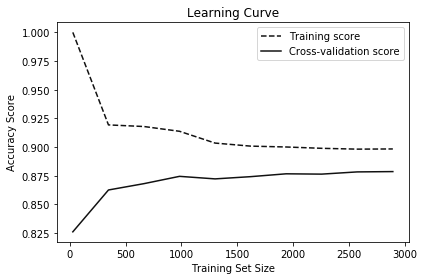

In [140]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [136]:
#SVM classifier 
def SVM(x_train,y_train, x_test):
    model = svm.SVC(C=100,kernel='rbf',gamma=1)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred
# Scikit learn library results
y_pred=SVM(X_train,y_train, X_test)
print(accuracy_score(y_test,y_pred))

0.8880597014925373


In [105]:
#Logistic regression classifier
from sklearn.linear_model import LogisticRegression
# sklearn functions implementation
def logRegrPredict(x_train, y_train,xtest ):
    # Build Logistic Regression Model
    logreg = LogisticRegression(solver='lbfgs')
    # Train the model using the training sets
    logreg.fit(x_train, y_train)
    y_pred= logreg.predict(xtest)
    #print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
    return y_pred

y_pred = logRegrPredict(X_train, y_train,X_test)
print('Accuracy on test set: '+str(accuracy_score(y_test,y_pred)))

Accuracy on test set: 0.8797678275290216
